# Exploring taste in music using  Spotify API & Python

## Introduction

Our team is a big music fan and we listen to Spotify (one of the most popular audio streaming platforms around the globe) regularly. Although we all are music fans, our taste in music is different. That made us curious to analyse what features in a song do we like that makes us all have different tastes. In order to explore that we decided to analyse one of our friends playlist. On doing some research, we discovered that Spotify provides  access to their API through which we get access to millions of song attributes. This can help us understand our preferred music tastes which in turn can help us decide which music to listen to and make a better playlist. We believe that this would be an interesting problem to solve. Any comments or suggestions are much appreciated. 

## Tools

1. Audio features extracted using Spotify API
2. Using Spotipy, a lightweight Python library for Spotify API
3. Seaborn and matplotlib for data visualization
4. Heatmap to understand correlation
5. Scikit-learn to build machine learning models

## Data - using Spotify API & audio features

Believe it or not, most of the popular products that you consume - Facebook, Slack, Twitter, Uber, Youtube etc provide an access to their API to developers & people interested in exploring their data. Companies do that because of network effect - the more consumers/users of their data, more valuable the product becomes. Also, the more people explore their data, more it helps these products to improve. Just like most of the popular products, Spotify also allows us to explore their music database & get insights on our listening habits. 

We obtained the music data of our friend using his Spotify ID. The songs that our friend liked were marked 1 & the ones that he didn't like were marked as 0. The following code collects 1378 songs and their associated features. 
Then we used pandas to bring the data into a dataframe. Next comes the exploration, cleaning & analysis process. 

In [18]:
#Import & setup spotipy
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:



os.environ['SPOTIPY_CLIENT_ID'] = 'ac9e3a4789554f5d94fa59ae08d857d4'
os.environ['SPOTIPY_CLIENT_SECRET'] = 'ce12a7f825254cf6900e9d55cf1e22c6'
os.environ['SPOTIPY_REDIRECT_URI'] = 'localhost:8888/callback'
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

username = '11179122386'
playlist_id = '0iUthHwhqDHphKatxaCYVN'
playlist = sp.user_playlist(username, playlist_id)

print(playlist['tracks']['total'])
    

tracks = playlist['tracks']['items']
next_uri = playlist['tracks']['next']



for _ in range(int(playlist['tracks']['total'] / playlist['tracks']['limit'])):
    
    response = sp._get(next_uri)
    tracks += response['items']
    next_uri = response['next']

print(type(tracks))

#print(tracks[0])
features = []
name = []

for track in playlist['tracks']['items']:
    features += sp.audio_features([track['track']['id']])
    name.append(track['track']['name'])
    #print('Name = '+track['track']['name']+' id = '+ track['track']['id'])

#print(features)
df = pd.DataFrame(features) 
df['name'] = name
df=df.drop(columns=['type', 'id', 'uri', 'track_href', 'analysis_url'])
df.to_csv('Songs') #to save the file named as song



1378
<class 'list'>
retrying after...2secs
retrying after...1secs
retrying after...1secs
retrying after...2secs
retrying after...1secs
retrying after...2secs
retrying after...2secs
retrying after...2secs


## Spotify Audio Features

The definition of the spotify audio features according to their official documentation is as below:

<b>Acousticness:</b> A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

<b>Danceability:</b> Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

<b>Energy:</b> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

<b>Instrumentalness:</b> Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

<b>Liveness:</b> Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.

<b>Loudness:</b> the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

<b>Speechiness:</b> Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

<b>Valence:</b> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

<b>Tempo:</b> The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


## Exploring the dataset

We added the likeness factor (like- 1 , unlike- 0) in our intitial raw dataset & saved the excel data into a new dataframe, df2. 

In [4]:
# Dataframe df2, after adding the likeness factor in our dataset
df2 = pd.read_excel("Category (1).xlsx")
df2.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,name,Like
0,0.0,0.782,0.436,2.0,-7.033,1.0,0.1550,0.3310,0.000013,0.3420,0.243,82.994,268933.0,Ghostface Killers,1
1,1.0,0.904,0.518,2.0,-5.320,1.0,0.1830,0.0305,0.000000,0.3250,0.188,137.996,303077.0,MotorSport,1
2,2.0,0.921,0.467,1.0,-8.443,1.0,0.1190,0.0149,0.000238,0.3340,0.287,135.995,191252.0,PICK IT UP (feat. A$AP Rocky),1
3,3.0,0.712,0.829,1.0,-4.707,0.0,0.1410,0.0149,0.000000,0.1220,0.593,173.953,332301.0,Powerglide (feat. Juicy J),1
4,4.0,0.739,0.792,11.0,-4.256,0.0,0.0418,0.0910,0.000000,0.0516,0.547,104.016,181615.0,Mama,1


In [5]:
#Printing the columns of our dataset
df2.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'name', 'Like'],
      dtype='object')

After removing the unwanted columns, we saved the updated data into a new dataframe, df3.

In [6]:
df3 = df2.drop(columns=['Unnamed: 0'])
df3.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,name,Like
0,0.782,0.436,2.0,-7.033,1.0,0.1550,0.3310,0.000013,0.3420,0.243,82.994,268933.0,Ghostface Killers,1
1,0.904,0.518,2.0,-5.320,1.0,0.1830,0.0305,0.000000,0.3250,0.188,137.996,303077.0,MotorSport,1
2,0.921,0.467,1.0,-8.443,1.0,0.1190,0.0149,0.000238,0.3340,0.287,135.995,191252.0,PICK IT UP (feat. A$AP Rocky),1
3,0.712,0.829,1.0,-4.707,0.0,0.1410,0.0149,0.000000,0.1220,0.593,173.953,332301.0,Powerglide (feat. Juicy J),1
4,0.739,0.792,11.0,-4.256,0.0,0.0418,0.0910,0.000000,0.0516,0.547,104.016,181615.0,Mama,1


In [7]:
#dataframe shape
df3.shape

(1379, 14)

In [8]:
# Create a dictionary in which the keys are the name of songs in our list and the values are to check for duplicates
my_dict = dict(df3.name.value_counts())
my_dict

{"King's Dead (with Kendrick Lamar, Future & James Blake)": 2,
 'Chhu Kar Mere Manko - From "Yaarana"': 2,
 'Runaway': 2,
 'Famous': 2,
 'Challa': 2,
 'I Like It': 2,
 'Dil Kya Kare - From "Julie"': 2,
 'I Am': 2,
 'i': 2,
 'The Way You Look Tonight': 2,
 'Jaane Jaan Dhoondata - From "Jawani Diwani"': 2,
 'Numb': 2,
 "(Sittin' On) the Dock of the Bay": 2,
 'OOOUUU': 2,
 'Yeh Vaada Raha - Yeh Vaada Raha / Soundtrack Version': 2,
 'COFFEE BEAN': 1,
 'Fun (feat. Tove Lo)': 1,
 'Low Lights': 1,
 'CASTLE OF GLASS - M. Shinoda Remix': 1,
 'Nagada Nagada (From "Jab We Met")': 1,
 'POWER': 1,
 'Wavy (feat. Joe Moses)': 1,
 'Zehnaseeb': 1,
 'Love Mera Hit Hit': 1,
 '6 Foot 7 Foot': 1,
 "I'LL BE GONE (feat. Pusha T) - Vice Remix": 1,
 'The Messenger': 1,
 'When They Come for Me': 1,
 'Tired of Being Alone': 1,
 'PICK IT UP (feat. A$AP Rocky)': 1,
 'TiK ToK': 1,
 'Long Live the Chief': 1,
 'The Tracks Of My Tears': 1,
 'Baby Love': 1,
 'Kehdoon Tumhen - From "Deewaar"': 1,
 'Dreamcatcher (feat. S

The songs above with value as '2' are the songs with same names but different artists.

In [14]:
#ratio of liked songs to unliked songs in order to check for selection bias
df3['Like'].value_counts()

1    690
0    689
Name: Like, dtype: int64

In [19]:
#columns
df3.columns
arr=['acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence']

## Data Analysis

We'll commence by plotting a bar chart of the mean values of the audio features. The plots show that the predominant feature in the liked songs category is 'danceability' whereas in the unliked songs category, the predominant feature is 'energy'. 'Instrumentalness' & 'speechiness' are the features which are lacking in both the categories which shows that our friend likes non-instrumental tracks more & also the ones in which there is less vocal. 

In [20]:
def means(df3,name):
    numeric = df3.drop(['name','Like','mode'], axis=1)
    small = numeric.drop(['tempo','duration_ms','key','loudness'], axis=1)
    sns.color_palette('pastel')
    small.mean().plot.bar()
    plt.title('Mean Values of Audio Features'+ name, fontsize = 12)
    plt.figure(figsize=(10,5))
    plt.show()

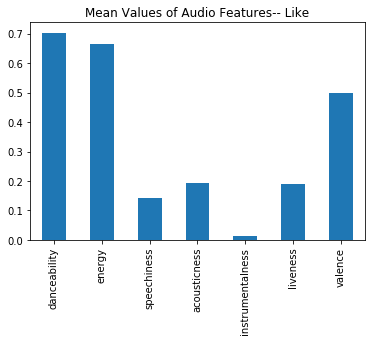

<Figure size 720x360 with 0 Axes>

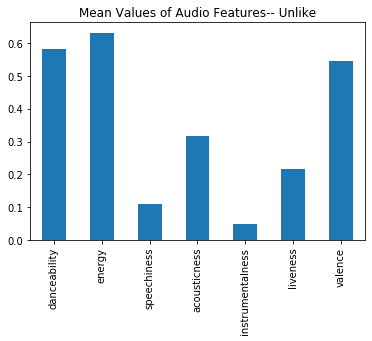

<Figure size 720x360 with 0 Axes>

In [21]:
df3_likes=df3[df3['Like']==1]
df3_unlikes=df3[df3['Like']==0]
means(df3_likes,'-- Like')
means(df3_unlikes,'-- Unlike')

Plotting the histogram of the dataset to get an idea about the distribution of each audio feature. 

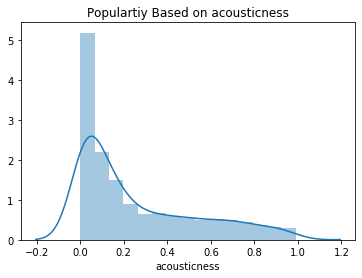

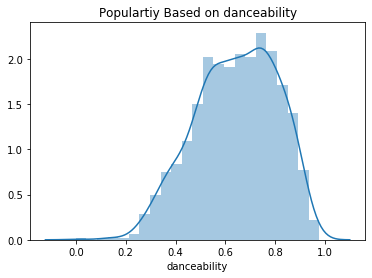

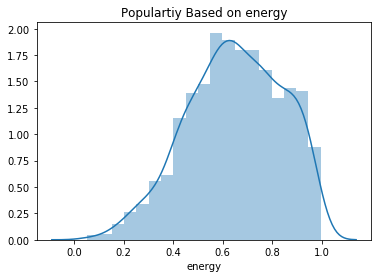

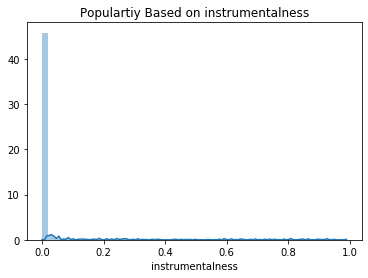

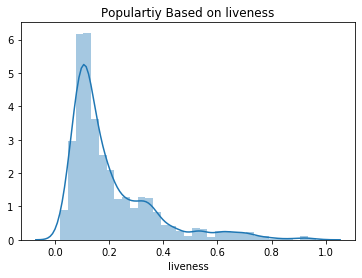

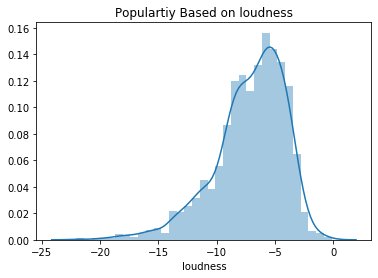

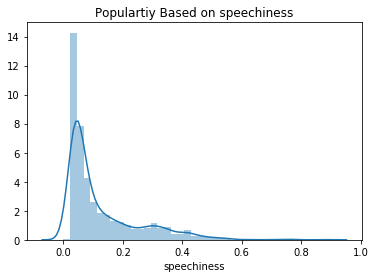

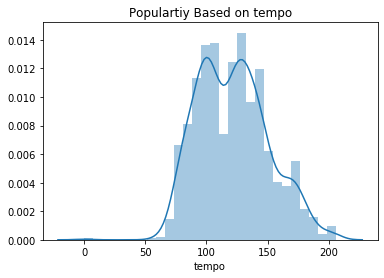

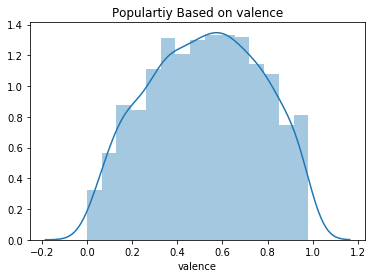

In [22]:
#Plotting the features
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(len(arr)):
    sns.distplot(df3[arr[i]])
    plt.title('Populartiy Based on '+ arr[i])
    plt.show()

### Variety of songs

It is important to check the diversity in our song selection. If there is much difference in the genres, that would mean that our selection is varied. We can examine this by calculating the standard deviation of each audio variable. Although the standard deviation of audio variables would not give us a proper picture, we can add the values & calculate the mean of the standard deviation of the lists. By doing so, we got the value as 0.18. This shows that our songs have some level of variability. 



In [23]:
features = df3.drop(['name','Like','mode','key','tempo','duration_ms','loudness'], axis=1)
round(features.std().mean(),2)

0.18

In [24]:
features.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
count,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,0.642520,0.649071,0.125389,0.256218,0.029955,0.202870,0.522079
std,0.163264,0.190653,0.124535,0.272900,0.130108,0.159548,0.244659
min,0.000000,0.053300,0.000000,0.000025,0.000000,0.018800,0.000000
25%,0.528250,0.518250,0.040500,0.036100,0.000000,0.099725,0.333250
50%,0.651000,0.652000,0.067750,0.141000,0.000002,0.142000,0.528500
75%,0.769000,0.797750,0.169000,0.429000,0.000218,0.260750,0.714750
max,0.977000,0.995000,0.881000,0.990000,0.989000,0.964000,0.980000


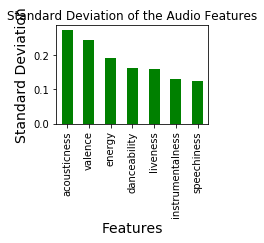

In [25]:
plt.subplot(221)
features.std().sort_values(ascending= False).plot(kind = 'bar', color = 'green')
plt.xlabel('Features', fontsize = 14)
plt.ylabel('Standard Deviation', fontsize = 14)
plt.title("Standard Deviation of the Audio Features")

plt.rcParams['figure.figsize'] =(10,5)


### Correlation HeatMap

We plotted the heatmap to check the correlation between different variables. As you can see, there is a high correlation between loudness & energy, and a very low correlation between energy & acousticness in the songs that our friend likes & dislikes.

In [29]:
def HeatMap(df,name):
    df_num_featuers=df[['acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence']]
    sns.set_style('ticks')
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    df_num_featuers=df_num_featuers.corr()
    sns.heatmap(df_num_featuers,annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.savefig(name+".png")
    plt.show()

In [30]:
df_likes=df3[df3['Like']==1]
df_unlikes=df3[df3['Like']==0]

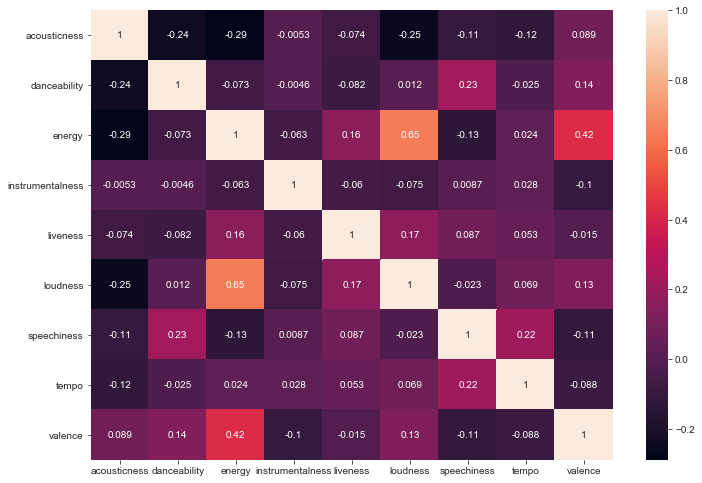

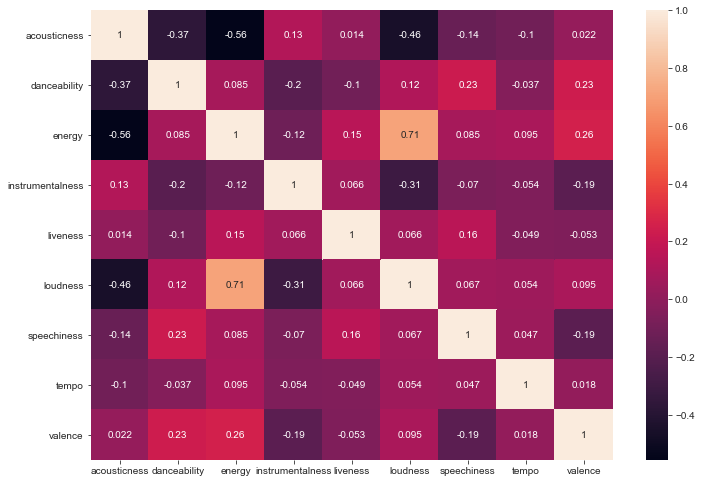

In [31]:
HeatMap(df_likes,"Likes")
HeatMap(df_unlikes,"Unlikes")

Understanding the difference between the heat map of Likes vs Dislikes

In [32]:
df_test_low=df_unlikes.corr()
df_test_high=df_likes.corr()

In [33]:
#Plotting the heatmap for correlation difference between songs that are liked and unliked. 
df_diff=df_test_high-df_test_low

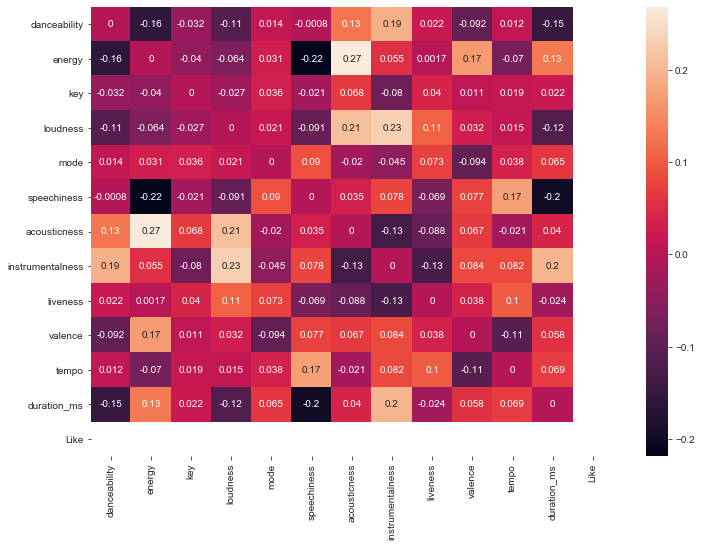

In [34]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
# df_num=df_num.corr()
sns.heatmap(df_diff,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig("output_diff.png")
plt.show()

### Acousticness & Loudness 

The correlation between loudness & acousticness here shows that there is a lot of similarity in these features for both the categories of songs (like & unlike). 
The liked songs are green dots whereas the unliked songs are gray dots here.

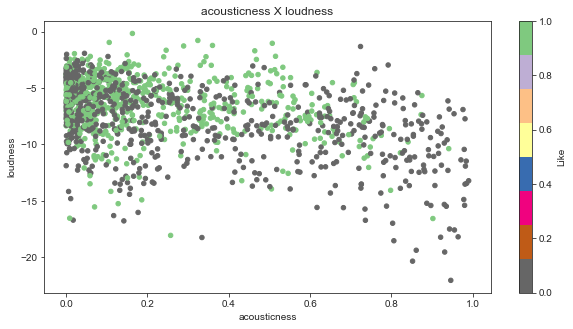

In [37]:
fig, ax = plt.subplots()
df3.plot(kind='scatter',x='acousticness', y='loudness',ax = ax ,c='Like', colormap = 'Accent_r' ,title="acousticness X loudness")
ax.set_xlabel("acousticness")
plt.show()

### Danceability & Valence

The correlation between danceability & valence here shows that the songs that are liked have more danceability factor. 

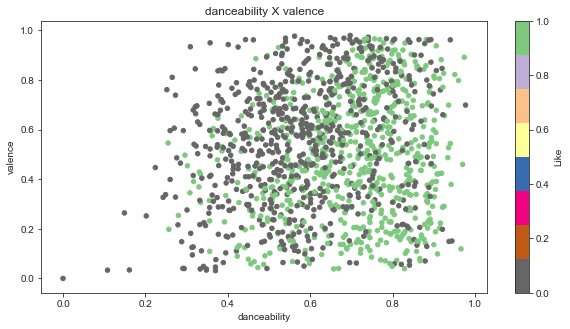

In [38]:
fig, ax = plt.subplots()
# style.use('seaborn')
df3.plot(kind='scatter',x='danceability', y='valence',ax = ax ,c='Like', colormap = 'Accent_r' ,title="danceability X valence")
ax.set_xlabel("danceability")
plt.show()

In [39]:
df3.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'name', 'Like'],
      dtype='object')

### Understanding which featuers are prevalent in  Likes Vs Dislikes 

In [40]:
array=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']

Understanding if there is any pattern in likes and dislikes

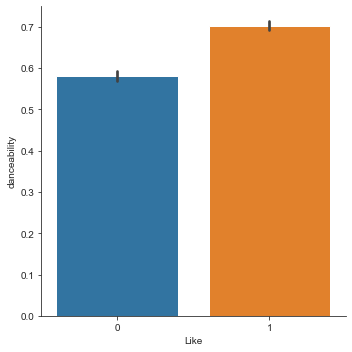

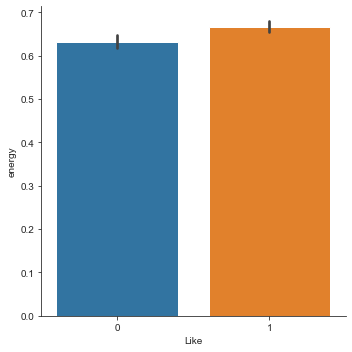

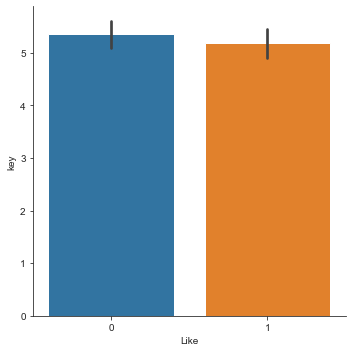

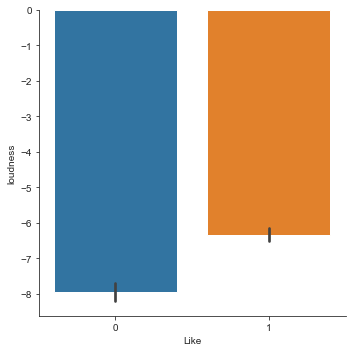

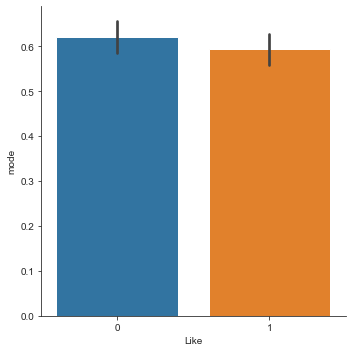

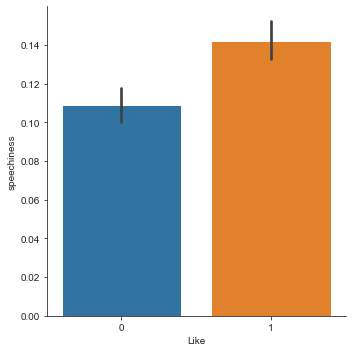

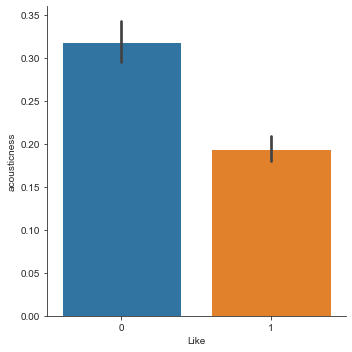

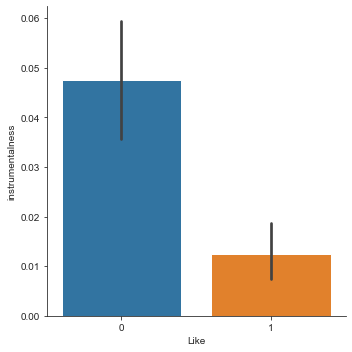

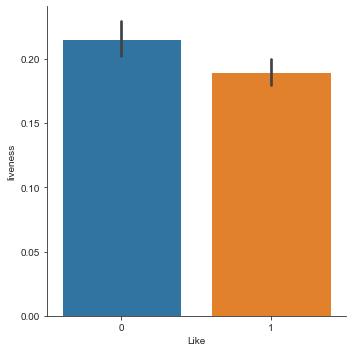

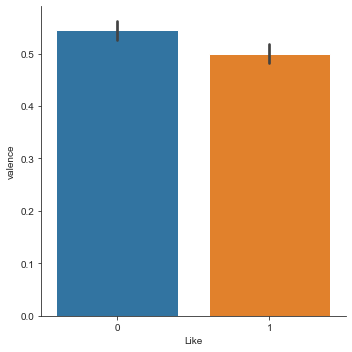

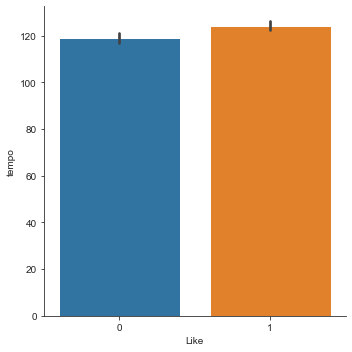

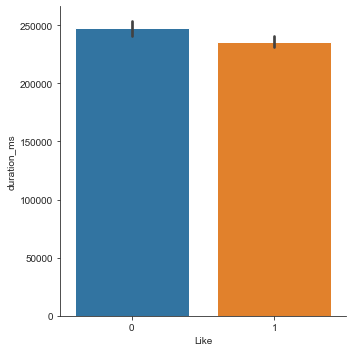

In [41]:
for i in range(len(array)):
    sns.catplot('Like',array[i],data=df3,kind='bar')

## Machine Learning Approach

As we have got some data, now is the time to implement the machine learning model. We have tried to implement the models learnt in the class. 

#### Removing missing values if any

In [47]:
df=df3.dropna()

In [64]:
def scores(y_test,y_pred):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix 
    from sklearn.metrics import f1_score
    import numpy as np
    from sklearn.metrics import roc_auc_score
    accuracy=accuracy_score(y_test, y_pred)
    f1Score=f1_score(y_test, y_pred,average='weighted')
    rocScore=roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred) 
    print("Accuracy: {}\nF1 Score: {}\nRoc Score:{} \n Confusion Matrix :\n{}".format(accuracy,f1Score,rocScore,cm) )

                                   danceability


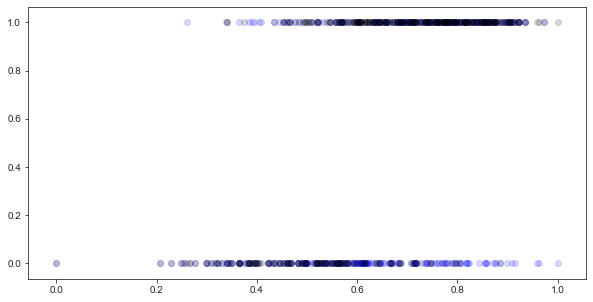

                                   energy


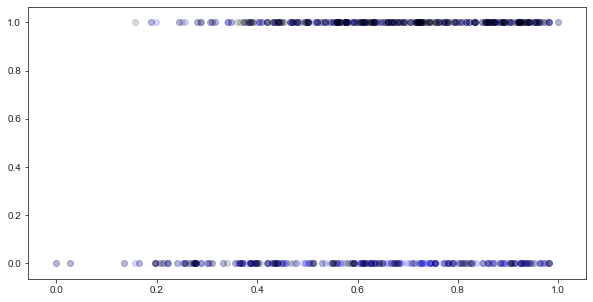

                                   key


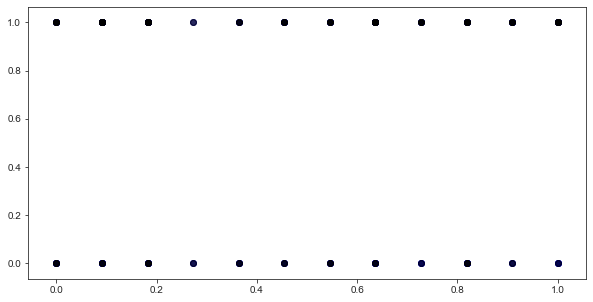

                                   loudness


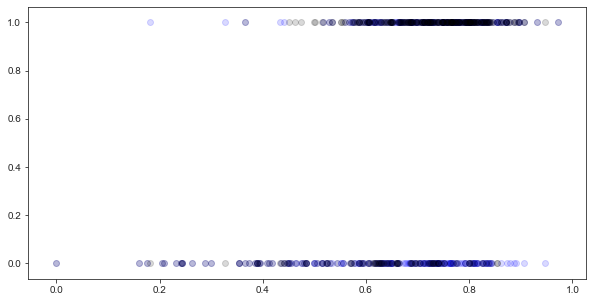

                                   mode


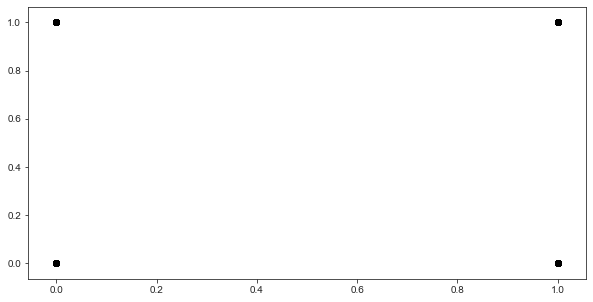

                                   speechiness


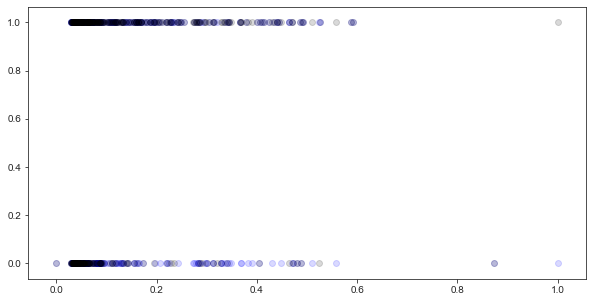

                                   acousticness


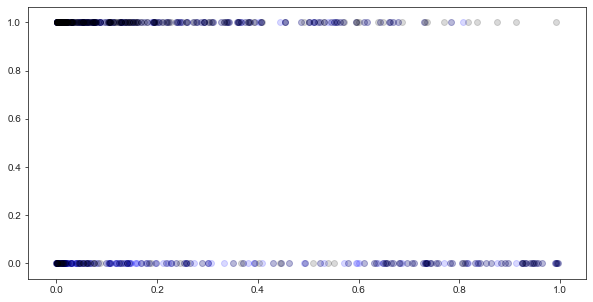

                                   instrumentalness


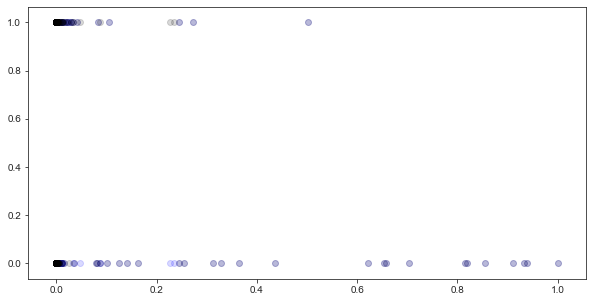

                                   liveness


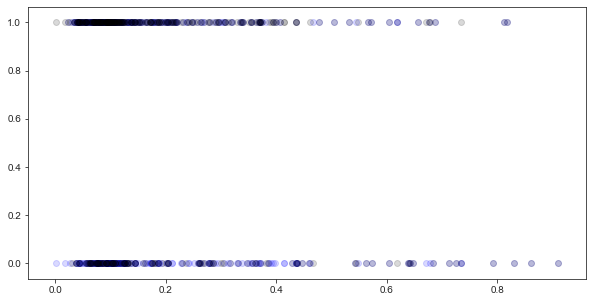

                                   valence


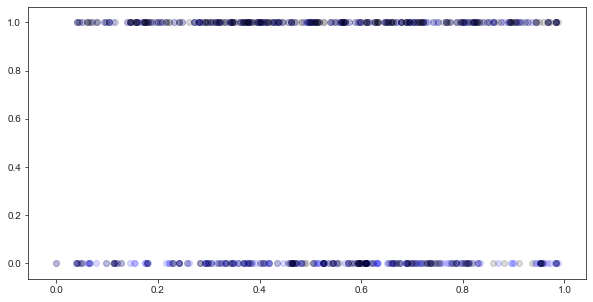

                                   tempo


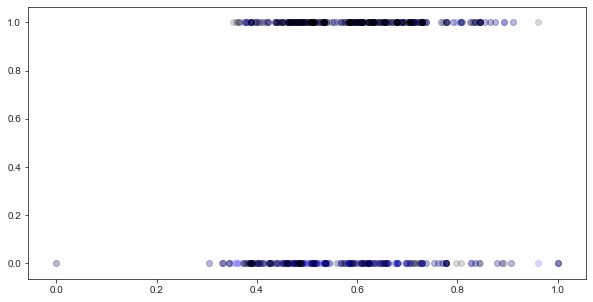

                                   duration_ms


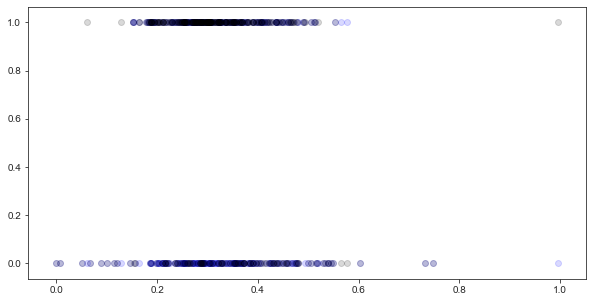

Accuracy: 0.6811594202898551
F1 Score: 0.6717758985200847
Roc Score:0.6811594202898551 
 Confusion Matrix :
[[106 101]
 [ 31 176]]


In [65]:
X=df.drop(columns=['name','Like'])
y=df['Like']

#Normalizing the Data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
df_Norm_X = pd.DataFrame(x_scaled)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log", max_iter=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test) 
space=" "
for i in range(X_test.shape[1]):
    print(space*35+array[i])
    plt.scatter(X_test[:,i], y_test, color ='b',alpha=.15)
    plt.scatter(X_test[:,i], y_pred, color ='k',alpha=.15) 
    plt.show() 

scores(y_test,y_pred)

#### In the above graph:
1. Blue dots corresponds a particular featuer on X axis and if the person is liking the the song or not (Test)
2. Black dots corresponds a particular featuer on X axis and if the person is liking the the song or not (Predication)


The F1 Score is low in SGD Classifier and based on confusion matrix the values of false positives is really high

                                   danceability


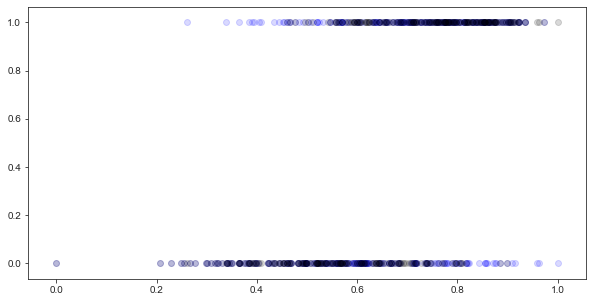

                                   energy


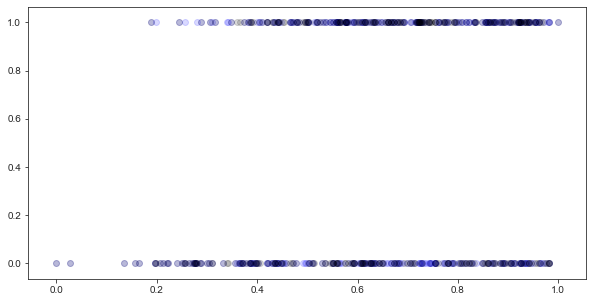

                                   key


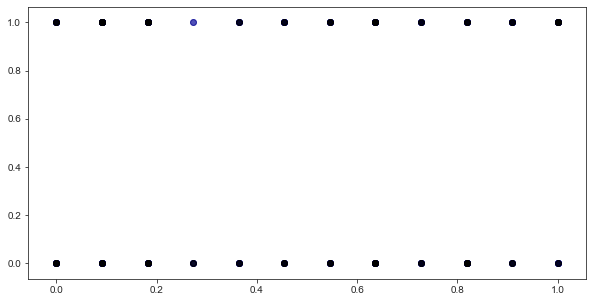

                                   loudness


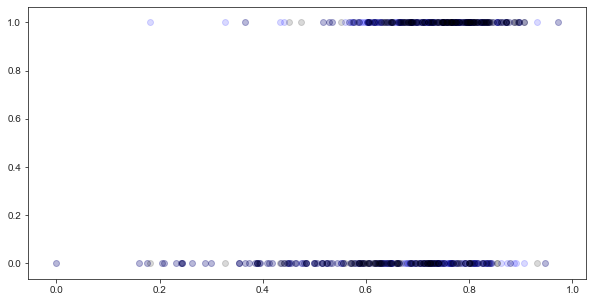

                                   mode


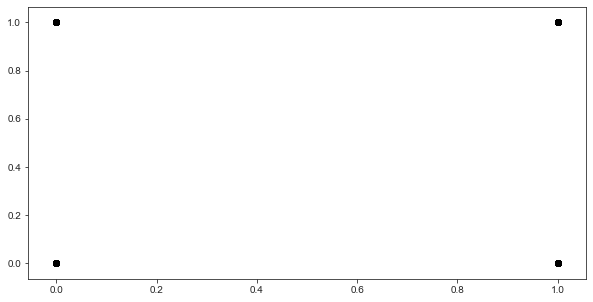

                                   speechiness


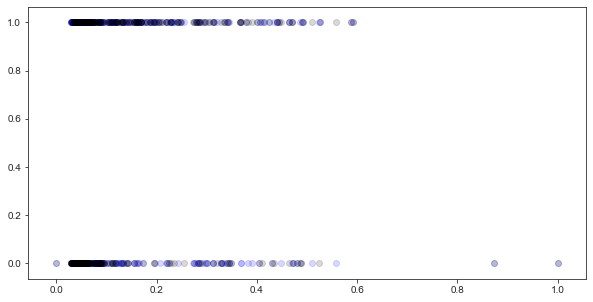

                                   acousticness


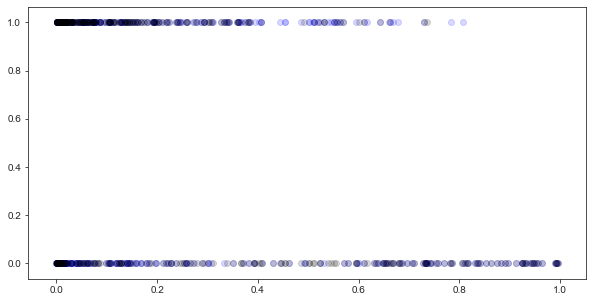

                                   instrumentalness


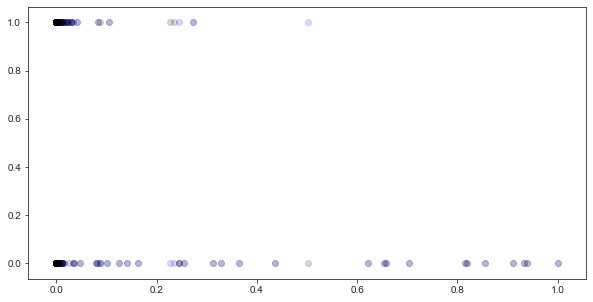

                                   liveness


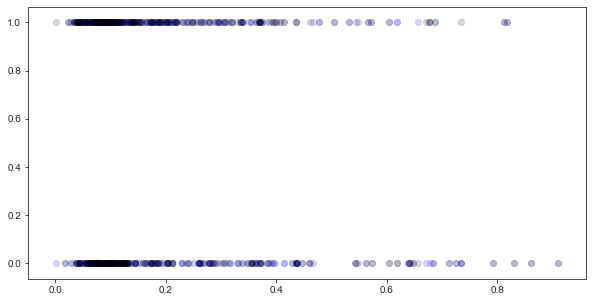

                                   valence


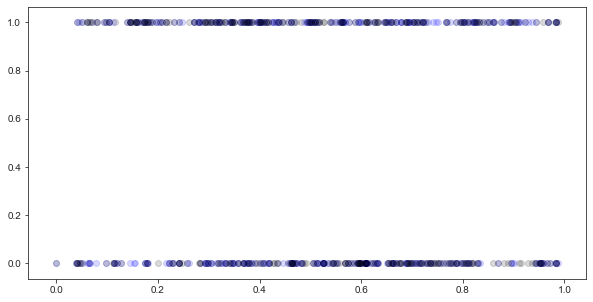

                                   tempo


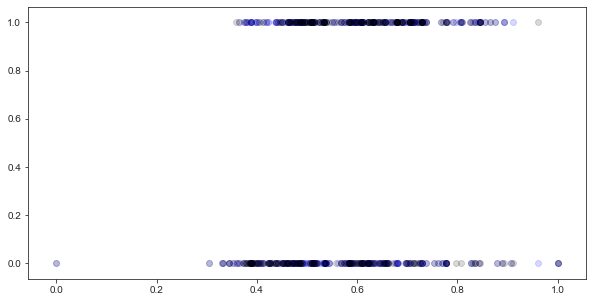

                                   duration_ms


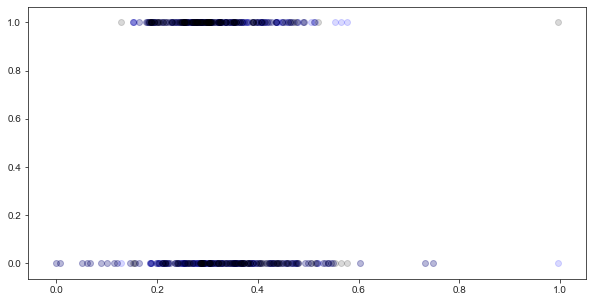

Accuracy: 0.6932367149758454
F1 Score: 0.6931919636344539
Roc Score:0.6932367149758454 
 Confusion Matrix :
[[141  66]
 [ 61 146]]


In [91]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test) 
for i in range(X_test.shape[1]):
    print(space*35+array[i])
    plt.scatter(X_test[:,i], y_test, color ='b',alpha=.15)
    plt.scatter(X_test[:,i], y_pred, color ='k',alpha=.15) 
    plt.show()
scores(y_test,y_pred)

Here in Logistic Regression the accuracy is signifacntly increasing lets explore other models as well

                                   danceability


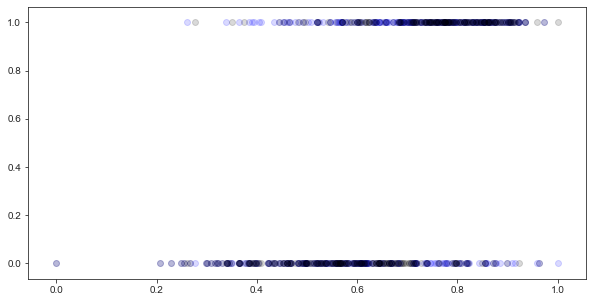

                                   energy


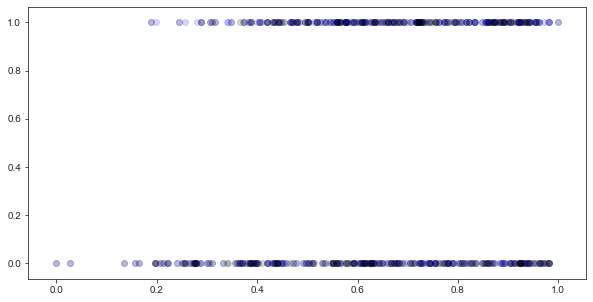

                                   key


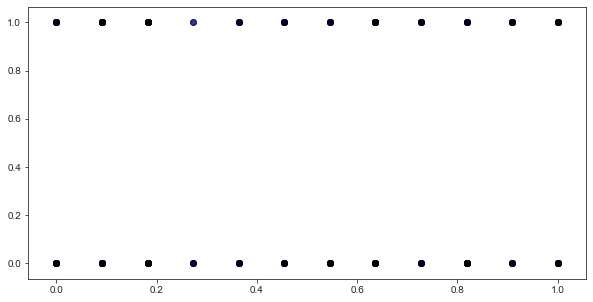

                                   loudness


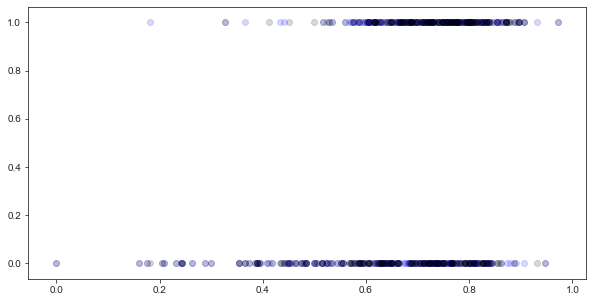

                                   mode


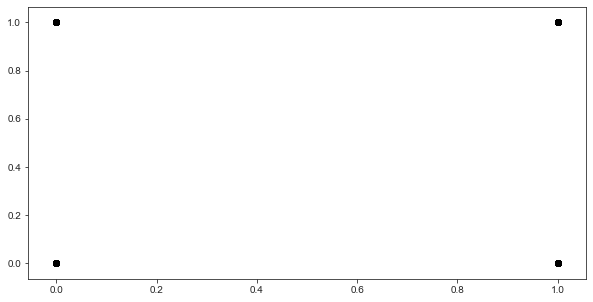

                                   speechiness


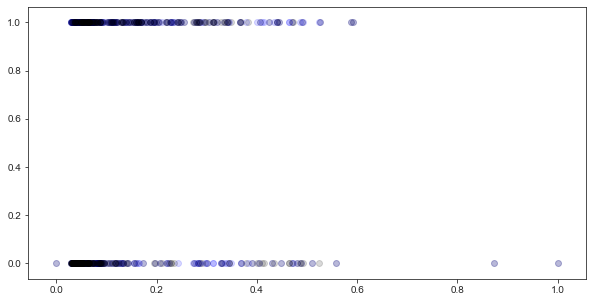

                                   acousticness


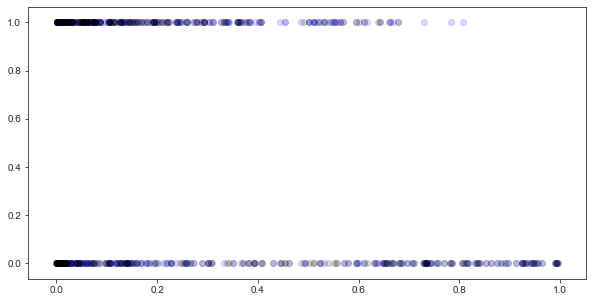

                                   instrumentalness


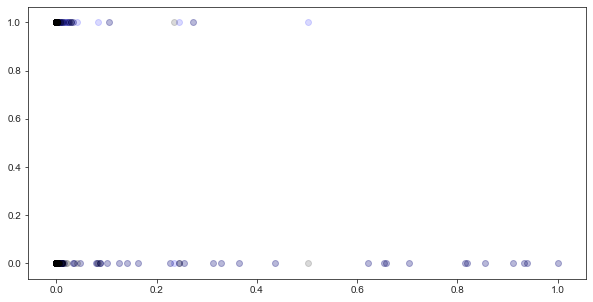

                                   liveness


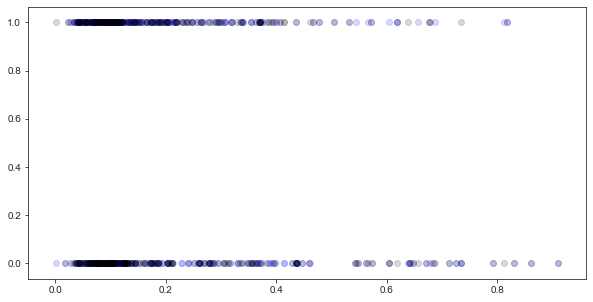

                                   valence


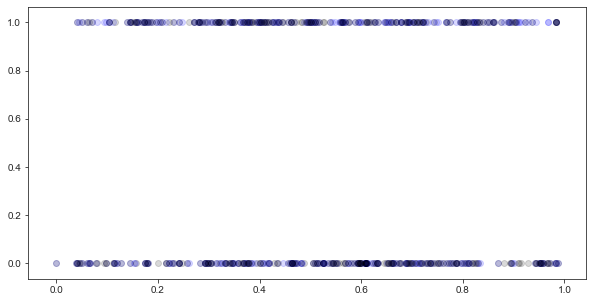

                                   tempo


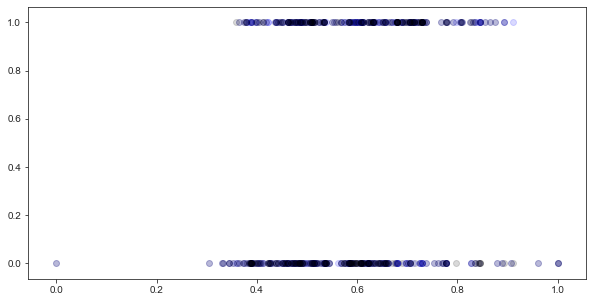

                                   duration_ms


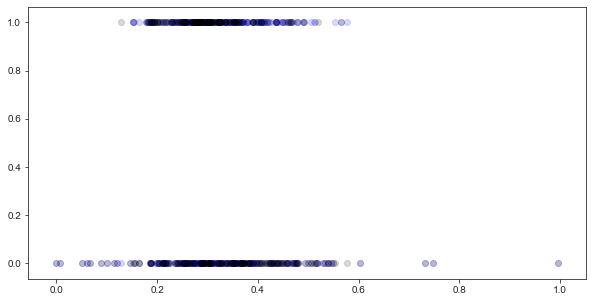

Accuracy: 0.7028985507246377
F1 Score: 0.702508018297492
Roc Score:0.7028985507246377 
 Confusion Matrix :
[[153  54]
 [ 69 138]]


In [66]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test) 
for i in range(X_test.shape[1]):
    print(space*35+array[i])
    plt.scatter(X_test[:,i], y_test, color ='b',alpha=.15)
    plt.scatter(X_test[:,i], y_pred, color ='k',alpha=.15) 
    plt.show()
scores(y_test,y_pred)

##### Here by using random forest our accuracy and F1 score is increasing drastically. 

1. This can be overfitting we will dig deeper in randomforest 
2. We can see there is significant reduction in False Positives

Below we are optimzing the parameters of Random Forest Classifier
We are using Randomzised Search to check if the above accuracy is result of overfitting. 

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
rf = RandomForestClassifier(random_state = 42,warm_start=True,oob_score=True)
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 2000, num = 2000)]
max_features  = list(range(1,X_train.shape[1]))
max_depth = [int(x) for x in np.linspace(start=1,stop=200,num=200)]
min_samples_splits = np.linspace(0.1, 1, 100, endpoint=True)
min_samples_leafs = np.linspace(0.1,0.5,50,endpoint=True)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_splits,
               'min_samples_leaf': min_samples_leafs,}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
print(rf_random.best_estimator_)
best_random = rf_random.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.8min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=26, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.17346938775510207,
                       min_samples_split=0.1272727272727273,
                       min_weight_fraction_leaf=0.0, n_estimators=1899,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=True)


We are using the best parameters and fitting our model into it

In [93]:
rf1=best_random.fit(X_train,y_train)
y_pred = best_random.predict(X_test)
print("OOB Score " + str(rf1.oob_score_))
scores(y_test,y_pred)

/Users/shubhamupasani/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


OOB Score 0.6773858921161826
Accuracy: 0.6763285024154589
F1 Score: 0.6748411600590813
Roc Score:0.6763285024154589 
 Confusion Matrix :
[[154  53]
 [ 81 126]]


According to above confusion matrix we can see that the number of false positives are still significantly lower than SGD Classifier but here number of True Positives have decreased compared to default Random Forest and Number of False Negatives has increased. This suggests that there was chance of overfitting in the default algorithm.

Lets use XGB Classifier

In [70]:
from xgboost.sklearn import XGBClassifier

clf  =  XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test) 
scores(y_test,y_pred)
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
print(cm)

Accuracy: 0.6980676328502415
F1 Score: 0.6980235862543839
Roc Score:0.6980676328502415 
 Confusion Matrix :
[[147  60]
 [ 65 142]]
[[147  60]
 [ 65 142]]


The accuracy is good hence we will implement Random Search to Optimze the parameters to check if there is any chance of overfitting

In [81]:
scale_pos_weight = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]
learning_rate  = [int(x) for x in np.linspace(start = 0, stop = 1, num = 100)]
colsample_bytree = [int(x) for x in np.linspace(start = 0, stop = 1, num = 100)]
subsample = [int(x) for x in np.linspace(start = 0, stop = 1, num = 100)]
n_estimators=[int(x) for x in np.linspace(start = 1, stop = 10000, num = 1000)]
reg_alpha = [int(x) for x in np.linspace(start = 0, stop = 1, num = 100)]
max_depth=[int(x) for x in np.linspace(start = 1, stop = 100, num = 100)]
gamma=[int(x) for x in np.linspace(start = 1, stop = 100, num = 100)]
# min_samples_leafs = np.linspace(0.1,0.5,50,endpoint=True)
random_grid = {'scale_pos_weight': scale_pos_weight,
               'learning_rate': learning_rate,
               'colsample_bytree': colsample_bytree,
               'n_estimators': n_estimators,
               'reg_alpha':reg_alpha,
               'max_depth':max_depth,
               "gamma":gamma}
clf  =  XGBClassifier(silent=False,objective='binary:logistic')
clf_1 = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
clf_1.fit(X_train, y_train)
# print(clf.best_estimator_)
# best_random = clf.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                        'n_estimators': [1, 11, 21, 31, 41, 51,
                                                         61, 71, 81, 91, 101,
                      

In [84]:
best_XGB = clf_1.best_estimator_
print(best_XGB)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0, gamma=6, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=1, max_delta_step=0, max_depth=60,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=6266, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=False, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)


In [86]:
rf1=best_XGB.fit(X_train,y_train)
y_pred = best_XGB.predict(X_test) 
scores(y_test,y_pred)

Accuracy: 0.6135265700483091
F1 Score: 0.6129484632464649
Roc Score:0.6135265700483091 
 Confusion Matrix :
[[135  72]
 [ 88 119]]


The Accuracy using best parameters is decreasing drastically, hence we can confirm that there was possiblity of over fitting in default XGB Classifier

Let us test our accuracy when we implement Neural Network. 

/Users/shubhamupasani/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


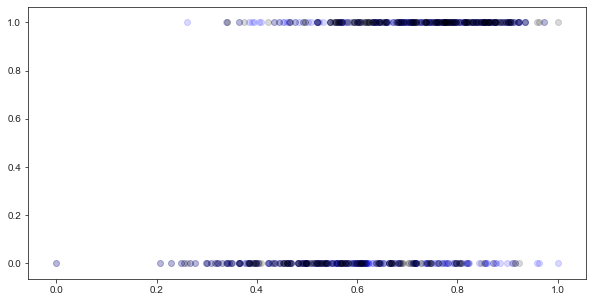

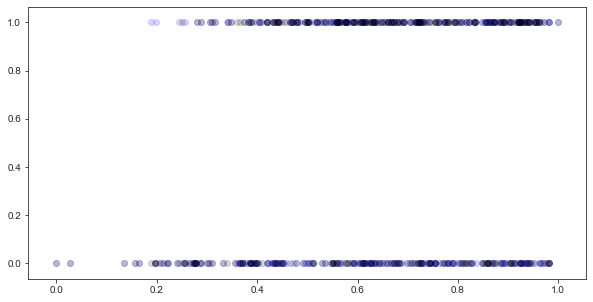

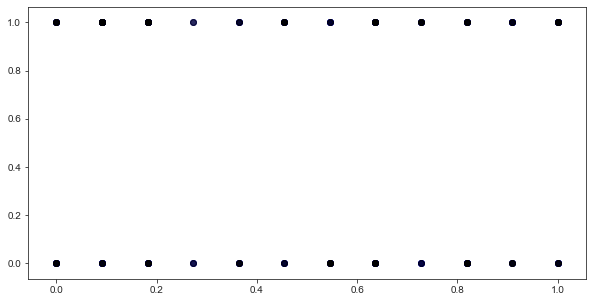

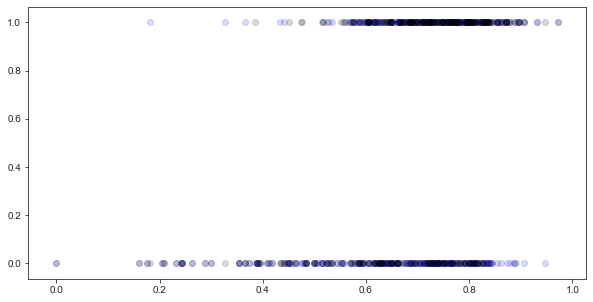

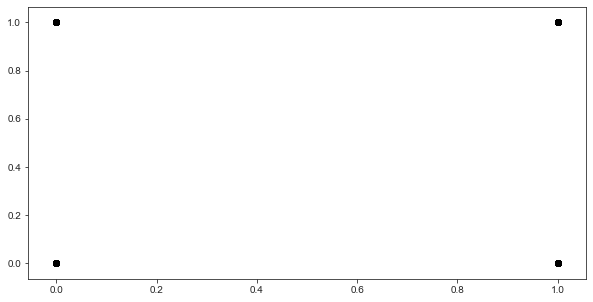

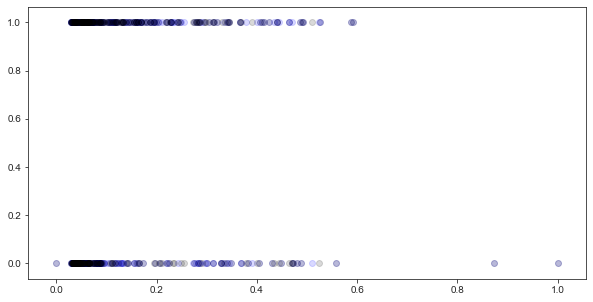

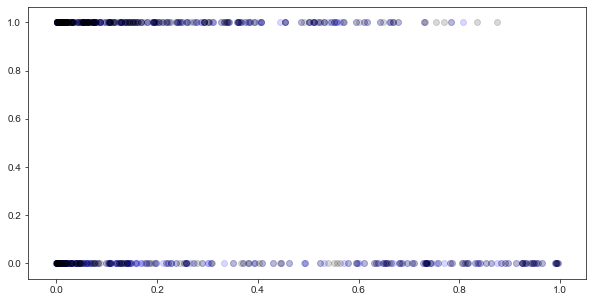

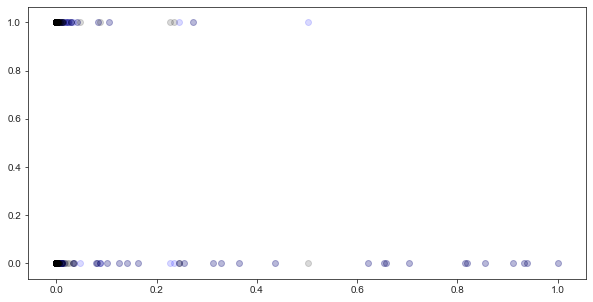

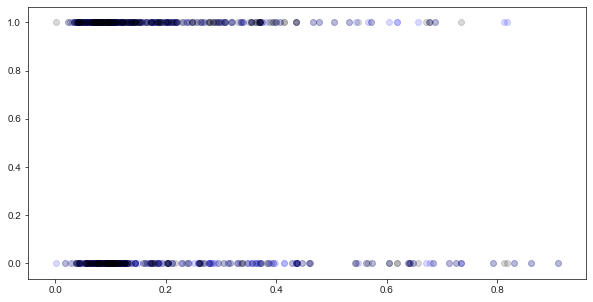

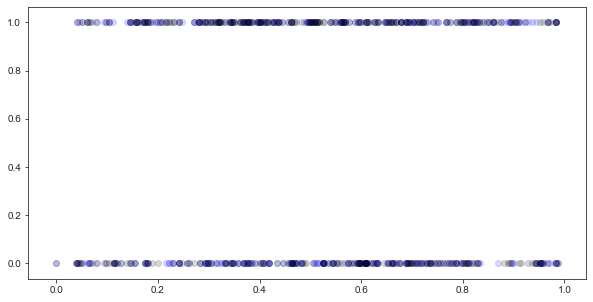

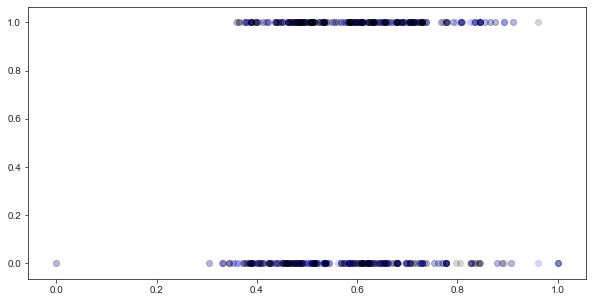

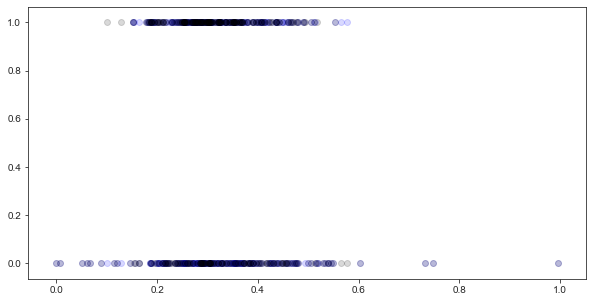

Accuracy: 0.6956521739130435
F1 Score: 0.6947903014416776
Roc Score:0.6956521739130435 
 Confusion Matrix :
[[133  74]
 [ 52 155]]


In [90]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(12, 6), random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test) 
for i in range(X_test.shape[1]):
    plt.scatter(X_test[:,i], y_test, color ='b',alpha=.15)
    plt.scatter(X_test[:,i], y_pred, color ='k',alpha=.15) 
    plt.show()
scores(y_test,y_pred)

Out of all the models the Best Accuracy is achieved by Random Forest and we have even tested the chance of overfitting.

### Conclusion
1. The best classifier worked for us was Random Forest Classifier
2. If we have information about likes and dislikes of a person for around 1000 songs, we can predict with 70% accuracy if the person will like any random song


### Future Scope
1. We need to improve our method of categorzing the songs as likes and dislikes- to address this issue we can use multiple playlist where one playlist will contain all the songs that are prefrred by user and other playlist will contain all the songs that are disliked by the user
2. Gather a more diverse playlist, a larger dataset results in better predictions and higher accuracy
3. A recommendation engine could be built in order to recommend songs that we would like